Source:  https://www.kaggle.com/hendratno/covid19-indonesia

# Import library and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('covid_19_indonesia_time_series_all-apr21.csv', parse_dates=['Date'])
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,489,35,39,...,106.836118,-6.204699,0.18,45.09,0.0,3.23,7.16%,7.98%,NaN,NaN
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,491,35,39,...,106.836118,-6.204699,0.18,45.27,0.0,3.23,7.13%,7.94%,1.0,1.0
2,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,2020-03-02,ID-JB,Jawa Barat,3,0,0,3,12,10,624,...,107.603708,-6.920432,0.07,0.27,0.0,0.22,83.33%,5200.00%,NaN,NaN
4,2020-03-02,ID-RI,Riau,1,0,0,1,2,2,8,...,101.805109,0.511648,0.16,0.33,0.0,0.33,100.00%,400.00%,NaN,NaN


In [3]:
df.shape

(13014, 37)

# Parsing dates for future grouping

In [4]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df['month'] = pd.DatetimeIndex(df['Date']).month
df['year'] = pd.DatetimeIndex(df['Date']).year

In [5]:
df.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,day,month,year
13009,2021-03-28,ID-SG,Sulawesi Tenggara,4,0,1,3,10249,205,9593,...,3888.88,0.00,77.79,2.00%,93.60%,0.31,0.00,28,3,2021
13010,2021-03-28,ID-SA,Sulawesi Utara,5,0,4,1,15351,499,12420,...,5810.63,0.00,188.88,3.25%,80.91%,0.26,1.00,28,3,2021
13011,2021-03-28,ID-SB,Sumatera Barat,106,2,74,30,31455,682,29611,...,5699.15,0.36,123.57,2.17%,94.14%,0.96,2.00,28,3,2021
13012,2021-03-28,ID-SS,Sumatera Selatan,101,3,77,21,17443,828,15450,...,2122.65,0.37,100.76,4.75%,88.57%,1.20,1.50,28,3,2021
13013,2021-03-28,ID-SU,Sumatera Utara,69,2,37,30,27120,903,23714,...,1823.21,0.13,60.71,3.33%,87.44%,0.86,0.67,28,3,2021


In [6]:
df[(df.month==10) & (df.Location == 'Indonesia')][['Date', 'Total Active Cases']].head()

,Date,Total Active Cases
6756,2020-10-01,61839
6791,2020-10-02,63187
6826,2020-10-03,63399
6861,2020-10-04,63894
6896,2020-10-05,63274


In [7]:
df[(df.Date=='2020-10-06') & (df.Location == 'Indonesia')]['Total Active Cases']

6931    63365
Name: Total Active Cases, dtype: int64

# Active cases development

C:\Users\kevin.wibowo\Miniconda3\envs\jcopml\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


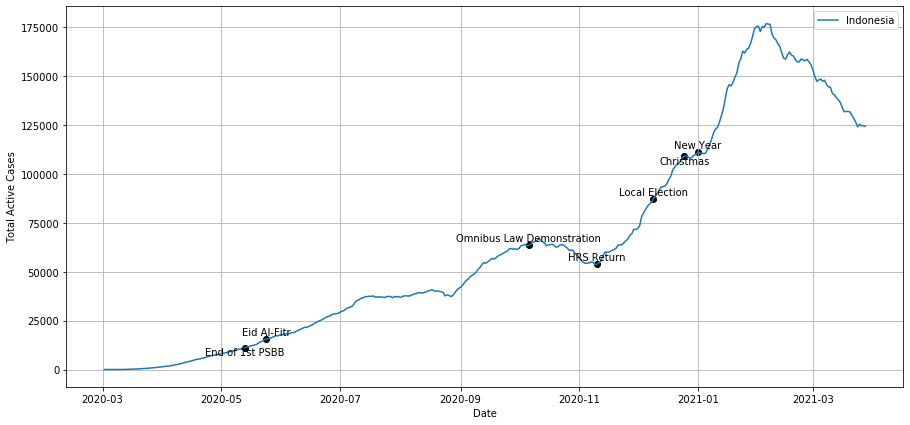

In [8]:
plt.figure(figsize=(15, 7))

# show the main plot
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Active Cases'], label='Indonesia')

# show the text
_.text('2020-12-25', (df[(df.Date == '2020-12-25') & (df.Location == 'Indonesia')]['Total Active Cases']-4000), "Christmas", ha='center')
_.text('2020-05-24', (df[(df.Date == '2020-05-24') & (df.Location == 'Indonesia')]['Total Active Cases']+2000), "Eid Al-Fitr", ha='center')
_.text('2020-12-09', (df[(df.Date == '2020-12-09') & (df.Location == 'Indonesia')]['Total Active Cases']+2000), 'Local Election', ha='center')
_.text('2020-11-10', (df[(df.Date == '2020-11-10') & (df.Location == 'Indonesia')]['Total Active Cases']+2000), 'HRS Return', ha='center')
_.text('2020-05-13', (df[(df.Date == '2020-05-13') & (df.Location == 'Indonesia')]['Total Active Cases']-4000), 'End of 1st PSBB', ha='center')
_.text('2020-10-06', (df[(df.Date == '2020-10-06') & (df.Location == 'Indonesia')]['Total Active Cases']+2000), 'Omnibus Law Demonstration', ha='center')
_.text('2021-01-01', (df[(df.Date == '2021-01-01') & (df.Location == 'Indonesia')]['Total Active Cases']+2000), 'New Year', ha='center')

# show the bullet
_ = plt.scatter(x='2020-12-25', y=df[(df.Date=='2020-12-25') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')
_ = plt.scatter(x='2020-12-09', y=df[(df.Date=='2020-12-09') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')
_ = plt.scatter(x='2020-05-24', y=df[(df.Date=='2020-05-24') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')
_ = plt.scatter(x='2020-11-10', y=df[(df.Date=='2020-11-10') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')
_ = plt.scatter(x='2020-05-13', y=df[(df.Date=='2020-05-13') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')
_ = plt.scatter(x='2020-10-06', y=df[(df.Date=='2020-10-06') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')
_ = plt.scatter(x='2021-01-01', y=df[(df.Date=='2021-01-01') & (df.Location == 'Indonesia')]['Total Active Cases'], color='k')

plt.grid()
plt.show()

# New cases development

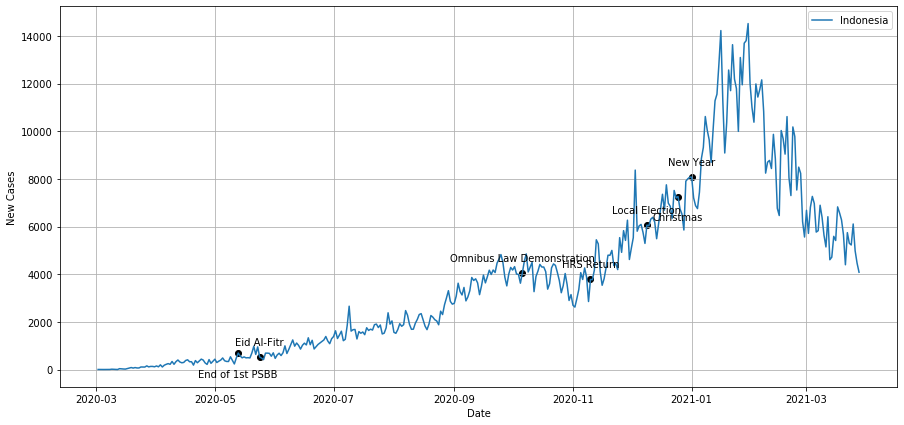

In [9]:
plt.figure(figsize=(15, 7))

# show the main plot
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['New Cases'], label='Indonesia')

# show the text
_.text('2020-12-25', (df[(df.Date == '2020-12-25') & (df.Location == 'Indonesia')]['New Cases']-1000), "Christmas", ha='center')
_.text('2020-05-24', (df[(df.Date == '2020-05-24') & (df.Location == 'Indonesia')]['New Cases']+500), "Eid Al-Fitr", ha='center')
_.text('2020-12-09', (df[(df.Date == '2020-12-09') & (df.Location == 'Indonesia')]['New Cases']+500), 'Local Election', ha='center')
_.text('2020-11-10', (df[(df.Date == '2020-11-10') & (df.Location == 'Indonesia')]['New Cases']+500), 'HRS Return', ha='center')
_.text('2020-05-13', (df[(df.Date == '2020-05-13') & (df.Location == 'Indonesia')]['New Cases']-1000), 'End of 1st PSBB', ha='center')
_.text('2020-10-06', (df[(df.Date == '2020-10-06') & (df.Location == 'Indonesia')]['New Cases']+500), 'Omnibus Law Demonstration', ha='center')
_.text('2021-01-01', (df[(df.Date == '2021-01-01') & (df.Location == 'Indonesia')]['New Cases']+500), 'New Year', ha='center')

# show the bullet
_ = plt.scatter(x='2020-12-25', y=df[(df.Date=='2020-12-25') & (df.Location == 'Indonesia')]['New Cases'], color='k')
_ = plt.scatter(x='2020-12-09', y=df[(df.Date=='2020-12-09') & (df.Location == 'Indonesia')]['New Cases'], color='k')
_ = plt.scatter(x='2020-05-24', y=df[(df.Date=='2020-05-24') & (df.Location == 'Indonesia')]['New Cases'], color='k')
_ = plt.scatter(x='2020-11-10', y=df[(df.Date=='2020-11-10') & (df.Location == 'Indonesia')]['New Cases'], color='k')
_ = plt.scatter(x='2020-05-13', y=df[(df.Date=='2020-05-13') & (df.Location == 'Indonesia')]['New Cases'], color='k')
_ = plt.scatter(x='2020-10-06', y=df[(df.Date=='2020-10-06') & (df.Location == 'Indonesia')]['New Cases'], color='k')
_ = plt.scatter(x='2021-01-01', y=df[(df.Date=='2021-01-01') & (df.Location == 'Indonesia')]['New Cases'], color='k')

plt.grid()
plt.show()

# Total Death

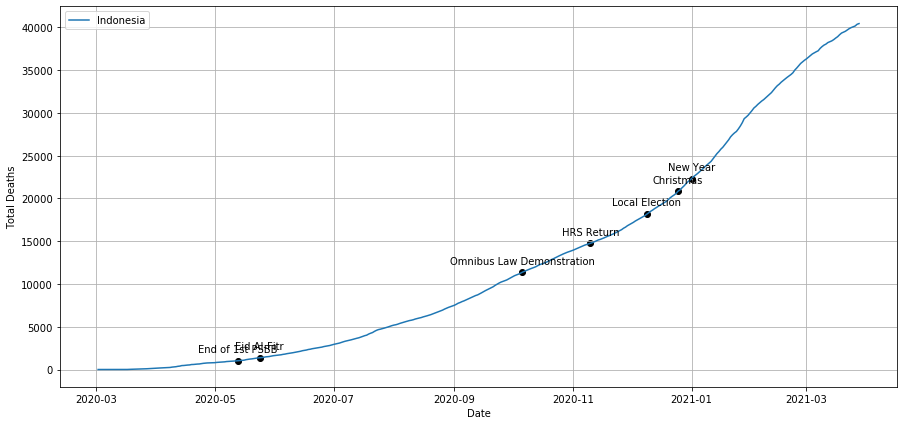

In [10]:
plt.figure(figsize=(15, 7))

# show the main plot
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Deaths'], label='Indonesia')

# show the text
_.text('2020-12-25', (df[(df.Date == '2020-12-25') & (df.Location == 'Indonesia')]['Total Deaths']+1000), "Christmas", ha='center')
_.text('2020-05-24', (df[(df.Date == '2020-05-24') & (df.Location == 'Indonesia')]['Total Deaths']+1000), "Eid Al-Fitr", ha='center')
_.text('2020-12-09', (df[(df.Date == '2020-12-09') & (df.Location == 'Indonesia')]['Total Deaths']+1000), 'Local Election', ha='center')
_.text('2020-11-10', (df[(df.Date == '2020-11-10') & (df.Location == 'Indonesia')]['Total Deaths']+1000), 'HRS Return', ha='center')
_.text('2020-05-13', (df[(df.Date == '2020-05-13') & (df.Location == 'Indonesia')]['Total Deaths']+1000), 'End of 1st PSBB', ha='center')
_.text('2020-10-06', (df[(df.Date == '2020-10-06') & (df.Location == 'Indonesia')]['Total Deaths']+1000), 'Omnibus Law Demonstration', ha='center')
_.text('2021-01-01', (df[(df.Date == '2021-01-01') & (df.Location == 'Indonesia')]['Total Deaths']+1000), 'New Year', ha='center')

# show the bullet
_ = plt.scatter(x='2020-12-25', y=df[(df.Date=='2020-12-25') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')
_ = plt.scatter(x='2020-12-09', y=df[(df.Date=='2020-12-09') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')
_ = plt.scatter(x='2020-05-24', y=df[(df.Date=='2020-05-24') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')
_ = plt.scatter(x='2020-11-10', y=df[(df.Date=='2020-11-10') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')
_ = plt.scatter(x='2020-05-13', y=df[(df.Date=='2020-05-13') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')
_ = plt.scatter(x='2020-10-06', y=df[(df.Date=='2020-10-06') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')
_ = plt.scatter(x='2021-01-01', y=df[(df.Date=='2021-01-01') & (df.Location == 'Indonesia')]['Total Deaths'], color='k')

plt.grid()
plt.show()

# Comparison between recovered and deaths

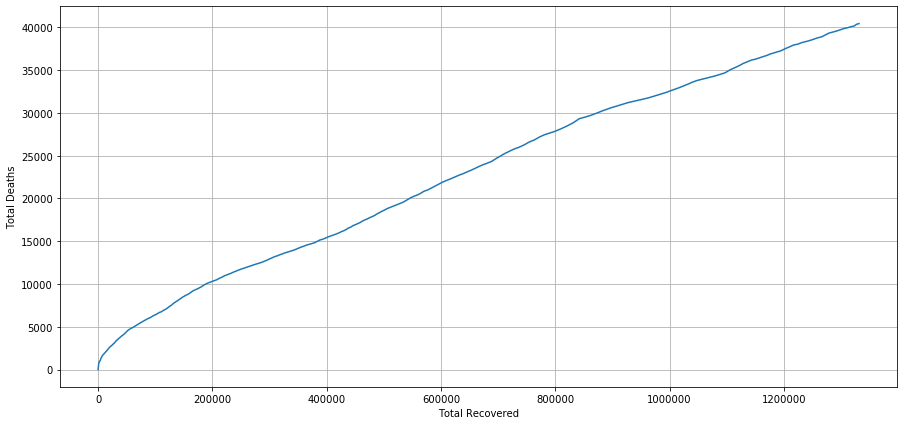

In [11]:
plt.figure(figsize=(15, 7))

sns.lineplot(x='Total Recovered', y='Total Deaths', data=df[df.Location == 'Indonesia'])

plt.grid()
plt.show()

# Indonesia Covid Status

```
# show 0 on all dates except on special dates
for_points = df[df.Location == 'Indonesia']['Date']
for_points = pd.DataFrame(for_points, columns = ['Date'])
for_points.Date = pd.to_datetime(for_points.Date)
for_points['Marker'] = 0
for_points = for_points.reset_index(drop=True)

special_date = ['2020-12-25', '2020-05-24', '2020-12-09', '2020-11-10', '2020-05-13', '2020-10-06', '2021-01-01']

for i in range(len(for_points)):
    if for_points['Date'][i] in pd.to_datetime(special_date):
        for_points['Marker'][i] = 147500

for_points[for_points.Date == '2020-12-25']
```

```
# to show the mark of the event all the way to top of the graphs
mark = 147500
my_event_list = [['2020-12-25', mark], ['2020-05-24', mark], ['2020-12-09', mark], ['2020-11-10', mark], ['2020-05-13', mark], ['2020-10-06', mark], ['2021-01-01', mark]]
event_points = pd.DataFrame(my_event_list, columns = ['Date', 'Marker'])
```

In [12]:
special_date = ['2020-04-10', '2020-05-13', '2020-05-24', '2020-07-31', '2020-08-17', '2020-08-20', '2020-10-06', '2020-10-28', 
                '2020-11-10', '2020-12-09', '2020-12-25', '2021-01-01', '2021-01-26', '2021-02-12']
special_event = ['First PSBB Jakarta', 'End of 1st PSBB', "Eid Al-Fitr", 'Eid-al Adha', 'Indonesian Independence Day', 'Islamic New Year', 
                 'Omnibus Law Demonstration', "Prophet's Birthday", 'HRS Return', 'Local \nElection', "Christmas", 
                 'New Year', 'January PSBB', 'Lunar New Year']

In [13]:
# to show the mark of the event until the total active cases
a = []
b = []
c = []
for i in range(len(special_date)):
    a.append(special_date[i])
    b.append(df[(df.Location == 'Indonesia') & (df.Date == special_date[i])]['Total Active Cases'].values)
    c.append(df[(df.Location == 'Indonesia') & (df.Date == special_date[i])]['Total Cases'].values)
events = pd.concat([pd.DataFrame(a), pd.DataFrame(b), pd.DataFrame(c)], axis=1)
events.columns=["Date", 'Active Marker', 'Total Marker']
events['Date'] = pd.to_datetime(events['Date'])
events.head(3)

,Date,Active Marker,Total Marker
0,2020-04-10,2924,3512
1,2020-05-13,11123,15438
2,2020-05-24,15497,22271


In [14]:
spec_date = pd.to_datetime(special_date)

In [15]:
(spec_date[2]-spec_date[1]).days

11

In [16]:
pd.Timedelta(14, unit='D')

Timedelta('14 days 00:00:00')

C:\Users\kevin.wibowo\Miniconda3\envs\jcopml\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
C:\Users\kevin.wibowo\Miniconda3\envs\jcopml\lib\site-packages\ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


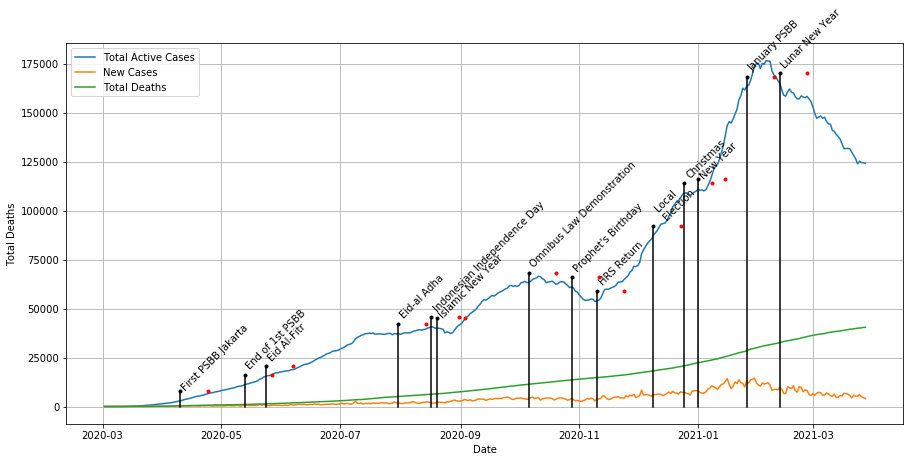

In [17]:
plt.figure(figsize=(15, 7))

# show the main plot
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Active Cases'], label='Total Active Cases')
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['New Cases'], label='New Cases')
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Deaths'], label='Total Deaths')

# show the text
for i in range(len(special_date)):
    if (spec_date[i]-spec_date[i-1]).days < 10:
        _.text(events['Date'][i], events[events['Date'] == special_date[i]]['Active Marker']+5000, special_event[i], ha='left', rotation=45)
    else:
        _.text(events['Date'][i], events[events['Date'] == special_date[i]]['Active Marker']+8000, special_event[i], ha='left', rotation=45)

# lolipop plot for events
_ = plt.stem(events['Date'], events['Active Marker']+5000, linefmt= 'k-', basefmt= ' ', markerfmt= 'k.')
# the red dot for 2 weeks timestamp after each event
_ = plt.stem(events['Date']+pd.Timedelta(14, unit='D'), events['Active Marker']+5000, linefmt= ' ', basefmt= ' ', markerfmt= 'r.')

plt.grid()
plt.show()

In [18]:
# the content is the same with the first one, the difference is only the typing (I insert enter here and there to beautify the plot)
special_event2 = ['First PSBB Jakarta', 'End of 1st PSBB', "Eid Al-Fitr", 'Eid-al Adha', 'Indonesian Independence Day', 'Islamic New Year', 
                 'Omnibus Law Demonstration', "Prophet's Birthday", 'HRS Return', 'Local Election', "Christmas", 
                 'New Year', 'January PSBB', 'Lunar New Year']

C:\Users\kevin.wibowo\Miniconda3\envs\jcopml\lib\site-packages\ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
C:\Users\kevin.wibowo\Miniconda3\envs\jcopml\lib\site-packages\ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


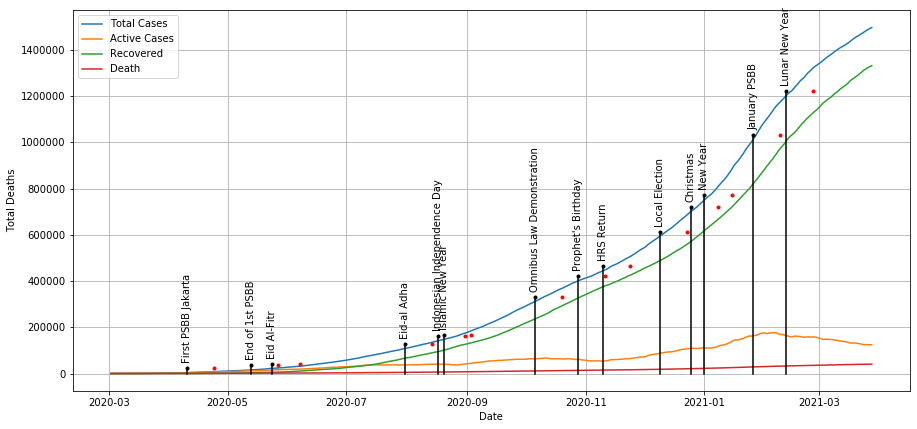

In [19]:
plt.figure(figsize=(15, 7))

# show the main plot
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Cases'], label='Total Cases')
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Active Cases'], label='Active Cases')
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Recovered'], label='Recovered')
_ = sns.lineplot(x=df[df.Location == 'Indonesia']['Date'], y=df[df.Location == 'Indonesia']['Total Deaths'], label='Death')

# show the text
for i in range(len(special_date)):
    _.text(events['Date'][i], events[events['Date'] == special_date[i]]['Total Marker']+50000, special_event2[i], ha='center', rotation=90)
    
# lolipop plot for events
_ = plt.stem(events['Date'], events['Total Marker']+20000, linefmt= 'k-', basefmt= ' ', markerfmt= 'k.')
# the red dot for 2 weeks timestamp after each event
_ = plt.stem(events['Date']+pd.Timedelta(14, unit='D'), events['Total Marker']+20000, linefmt= ' ', basefmt= ' ', markerfmt= 'r.')

plt.grid()
plt.show()

In [20]:
df.Location.nunique()

35

In [21]:
tot_case = df[df.month == 12].groupby(['Location'], as_index=False)['Total Cases'].max()
tot_pop = pd.merge(tot_case, df[df.month == 12].groupby(['Location', 'Island'], as_index=False)['Population'].mean())
tot_pop = tot_pop[~(tot_pop.Location =='Indonesia')]
tot_pop.head()

,Location,Total Cases,Island,Population
0,Aceh,8746,Sumatera,5247257
1,Bali,17593,Nusa Tenggara,4216171
2,Banten,18170,Jawa,10722374
3,Bengkulu,3603,Sumatera,1999539
4,DKI Jakarta,183734,Jawa,10846145


In [22]:
tot_pop.sort_values(by='Total Cases', ascending=False).head()

,Location,Total Cases,Island,Population
4,DKI Jakarta,183734,Jawa,10846145
10,Jawa Timur,84403,Jawa,40479023
8,Jawa Barat,83580,Jawa,45161325
9,Jawa Tengah,81716,Jawa,36364072
27,Sulawesi Selatan,31045,Sulawesi,9426885


In [23]:
tot_pop.sort_values(by='Population', ascending=False).head()

,Location,Total Cases,Island,Population
8,Jawa Barat,83580,Jawa,45161325
10,Jawa Timur,84403,Jawa,40479023
9,Jawa Tengah,81716,Jawa,36364072
33,Sumatera Utara,18149,Sumatera,14874889
4,DKI Jakarta,183734,Jawa,10846145


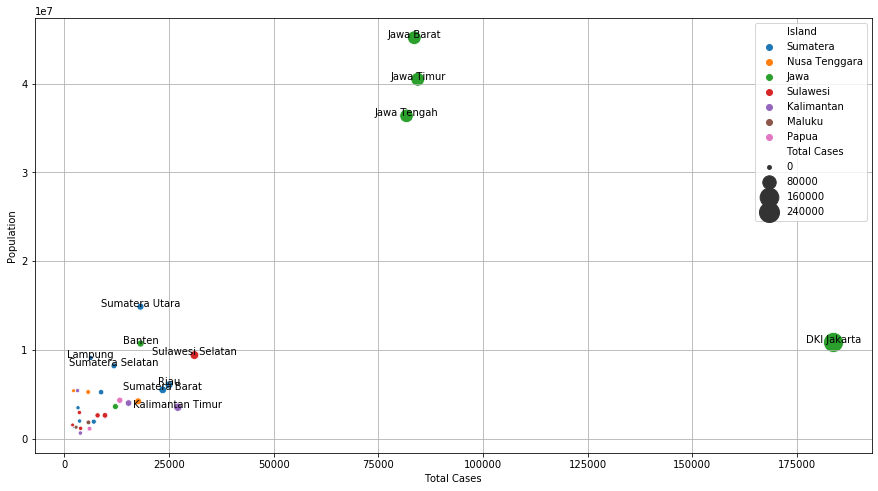

In [24]:
plt.figure(figsize=(15, 8))

_ = sns.scatterplot(x="Total Cases", y="Population", size="Total Cases", sizes=(15, 400) , data=tot_pop, hue='Island');

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Population[i] > 7500000) or (tot_pop['Total Cases'][i] > 20000):
        a = tot_pop[tot_pop.Location == var]['Total Cases']
        b = tot_pop[tot_pop.Location == var]['Population']
        _.text(a, b, var, ha='center')
#     elif (tot_pop.Island[i] == 'Sulawesi') and (tot_pop['Total Cases'][i] > 25000):
#         a = tot_pop[tot_pop.Location == var]['Total Cases']
#         b = tot_pop[tot_pop.Location == var]['Population']
#         _.text(a, b, var, ha='center')

plt.grid()
plt.show()

# Case Development in Province with more than 25k cases

Text(0.5, 1.0, 'Total Cases')

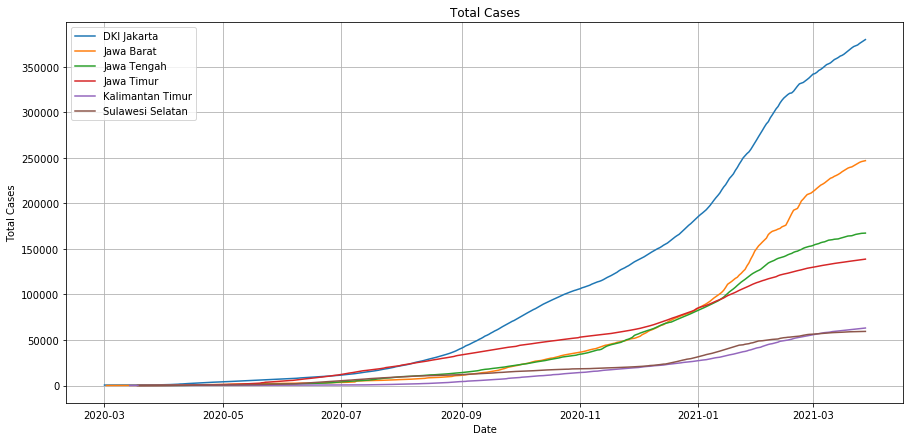

In [25]:
# Total Cases
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop['Total Cases'][i] > 25000):
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label=var)
        
plt.grid()
plt.title('Total Cases')

Text(0.5, 1.0, 'Total Active Cases')

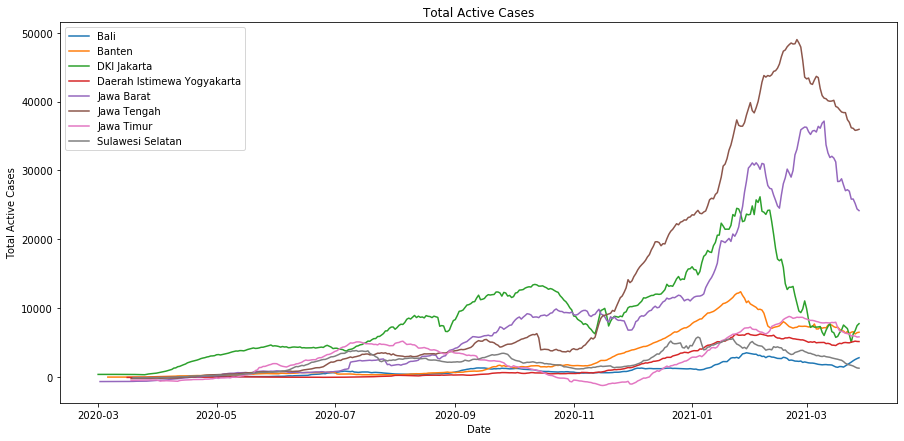

In [26]:
# Total Active Cases
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Jawa') or (tot_pop.Location[i] == 'Bali'):
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)
    elif (tot_pop.Island[i] == 'Sulawesi') and (tot_pop['Total Cases'][i] > 25000):
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)
plt.title('Total Active Cases')

So as we can see above, while DKI Jakarta have more total cases the active cases is below Jawa Tengah recently. But we cannot say that they are better because the active cases keep increasing (eventhough there are some time that the active case decreasing). Bali has lower active cases then other province in Java even when there are many tourist there, it probably because the total population is lower too and need more comparison with population in those area.

In [27]:
java_case = df[df.Island == 'Jawa']
bali_case = df[df.Location == 'Bali']
java_bali = pd.merge(java_case, bali_case, how='outer')
java_bali.tail()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths,day,month,year
2663,2021-03-24,ID-BA,Bali,189,1,0,188,38526,964,35362,...,9137.67,0.24,228.64,2.50%,91.79%,1.04,0.25,24,3,2021
2664,2021-03-25,ID-BA,Bali,201,2,0,199,38727,966,35362,...,9185.35,0.47,229.12,2.49%,91.31%,1.06,2.00,25,3,2021
2665,2021-03-26,ID-BA,Bali,178,3,0,175,38905,969,35362,...,9227.57,0.71,229.83,2.49%,90.89%,0.89,1.50,26,3,2021
2666,2021-03-27,ID-BA,Bali,145,3,0,142,39050,972,35362,...,9261.96,0.71,230.54,2.49%,90.56%,0.81,1.00,27,3,2021
2667,2021-03-28,ID-BA,Bali,121,3,0,118,39171,975,35362,...,9290.66,0.71,231.25,2.49%,90.28%,0.83,1.00,28,3,2021


In [28]:
java_bali_1 = java_bali[java_bali.month == 12].groupby(['Location'], as_index=False)['Total Cases'].max()
java_bali_1.head()

,Location,Total Cases
0,Bali,17593
1,Banten,18170
2,DKI Jakarta,183734
3,Daerah Istimewa Yogyakarta,12155
4,Jawa Barat,83580


In [29]:
java_bali_case = pd.merge(java_bali_1, java_bali[java_bali.month == 12].groupby(['Location', 'Island'], as_index=False)['Population'].mean())
java_bali_case.head()

,Location,Total Cases,Island,Population
0,Bali,17593,Nusa Tenggara,4216171
1,Banten,18170,Jawa,10722374
2,DKI Jakarta,183734,Jawa,10846145
3,Daerah Istimewa Yogyakarta,12155,Jawa,3631015
4,Jawa Barat,83580,Jawa,45161325


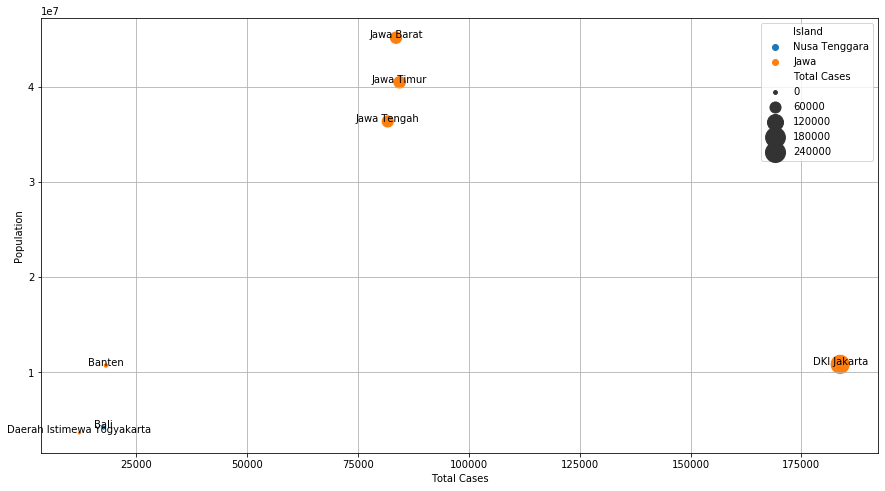

In [30]:
plt.figure(figsize=(15, 8))

_ = sns.scatterplot(x="Total Cases", y="Population", size="Total Cases", sizes=(15, 400) , data=java_bali_case, hue='Island');

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Jawa') or (tot_pop.Location[i] == 'Bali'):
        a = tot_pop[tot_pop.Location == var]['Total Cases']
        b = tot_pop[tot_pop.Location == var]['Population']
        _.text(a, b, var, ha='center')

plt.grid()
plt.show()

## Total Active Cases in each Island

### Java Island

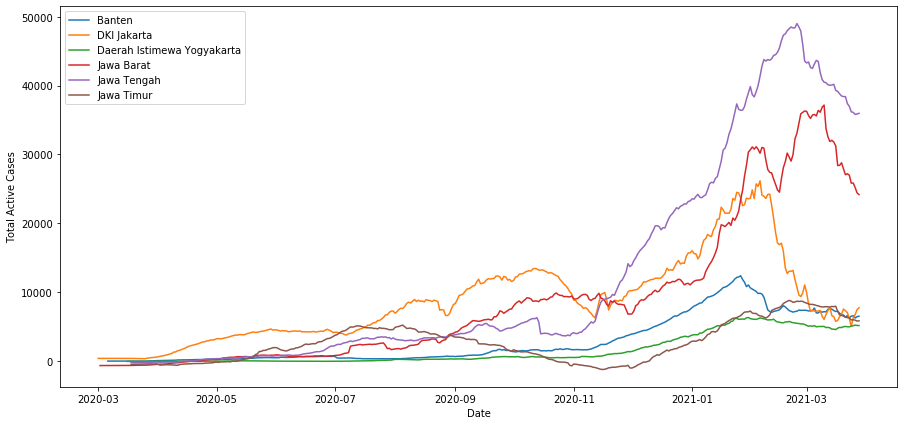

In [31]:
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Jawa'):
#         if tot_pop.Location == '(set your wanted location here)' then do another tab at plot row below
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)

### Sumatra

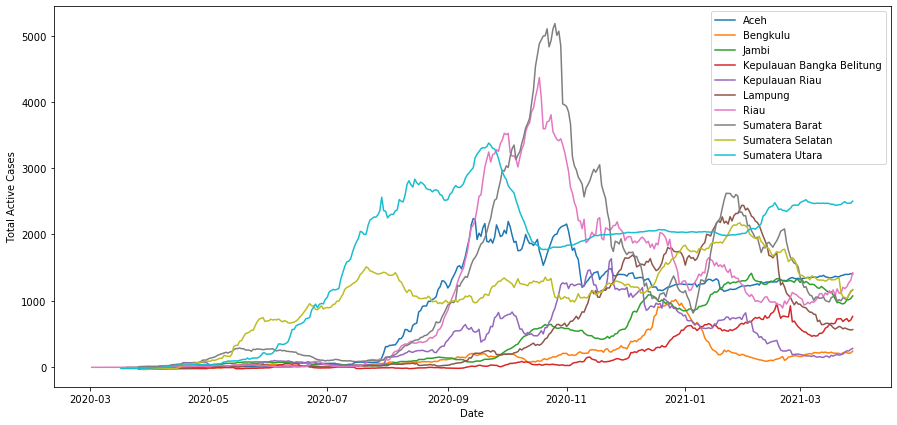

In [32]:
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Sumatera'):
#         if tot_pop.Location == '(set your wanted location here)' then do another tab at plot row below
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)

### Borneo

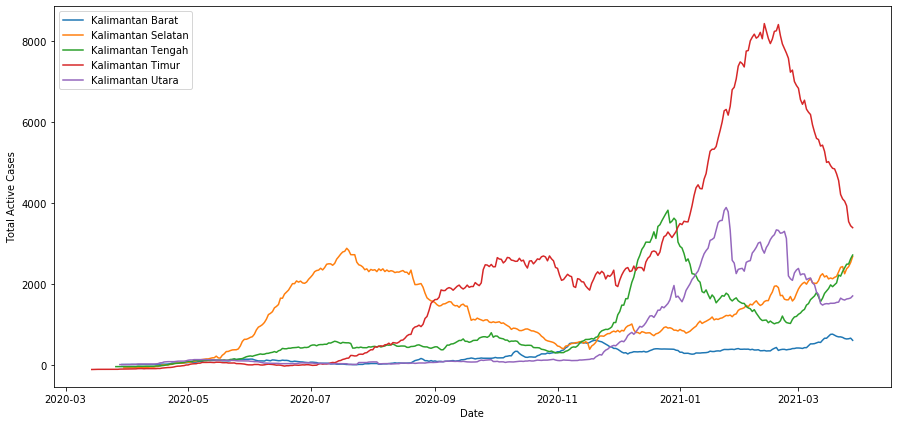

In [33]:
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Kalimantan'):
#         if tot_pop.Location == '(set your wanted location here)' then do another tab at plot row below
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)

### Nusa Tenggara & Bali

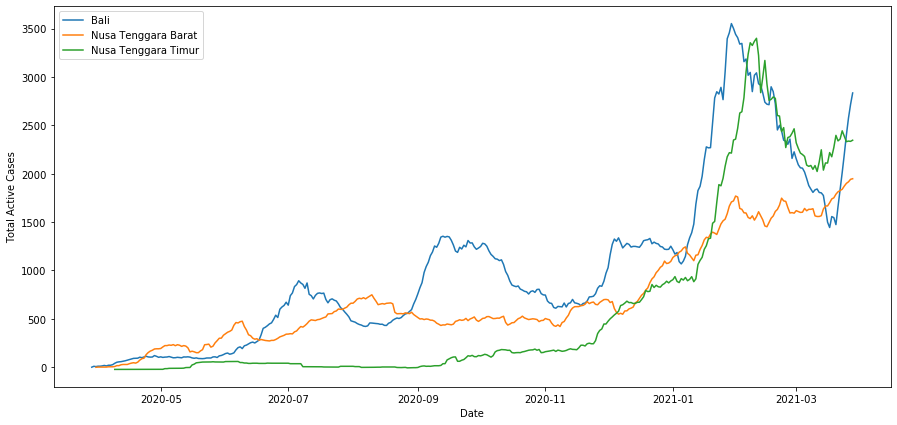

In [34]:
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Nusa Tenggara'):
#         if tot_pop.Location == '(set your wanted location here)' then do another tab at plot row below
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)

### Sulawesi

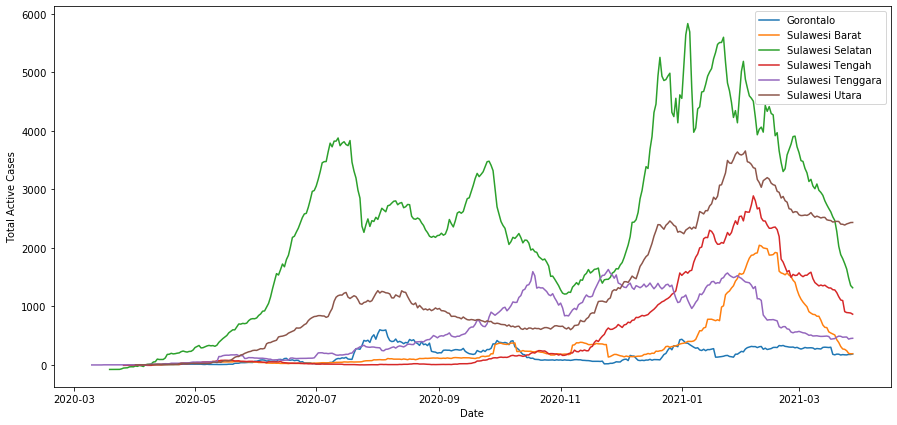

In [35]:
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Sulawesi'):
#         if tot_pop.Location == '(set your wanted location here)' then do another tab at plot row below
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)

### Papua

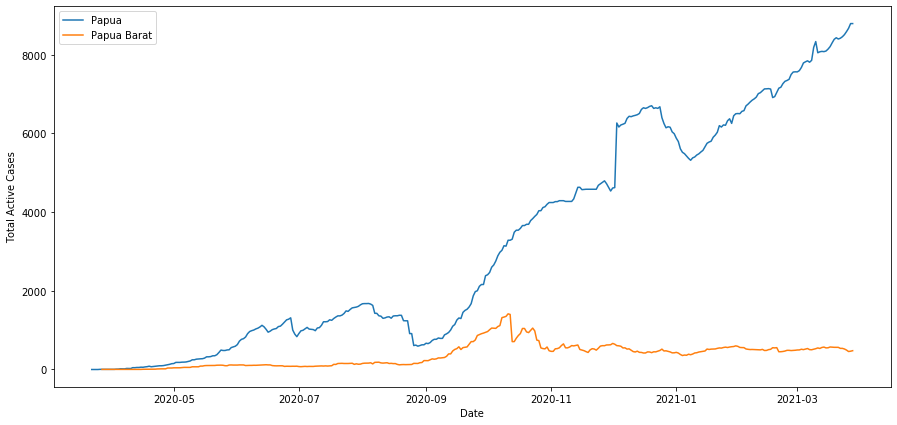

In [36]:
plt.figure(figsize=(15, 7))

for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Papua'):
#         if tot_pop.Location == '(set your wanted location here)' then do another tab at plot row below
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label=var)

In [37]:
island_count = df.groupby(['Date', 'Island'], as_index=False)['Total Active Cases'].sum()
island_count.head()

,Date,Island,Total Active Cases
0,2020-03-01,Jawa,415
1,2020-03-02,Jawa,-205
2,2020-03-02,Sumatera,-8
3,2020-03-03,Jawa,-203
4,2020-03-03,Sumatera,-8


In [38]:
island_count.Island.unique()[1]

'Sumatera'

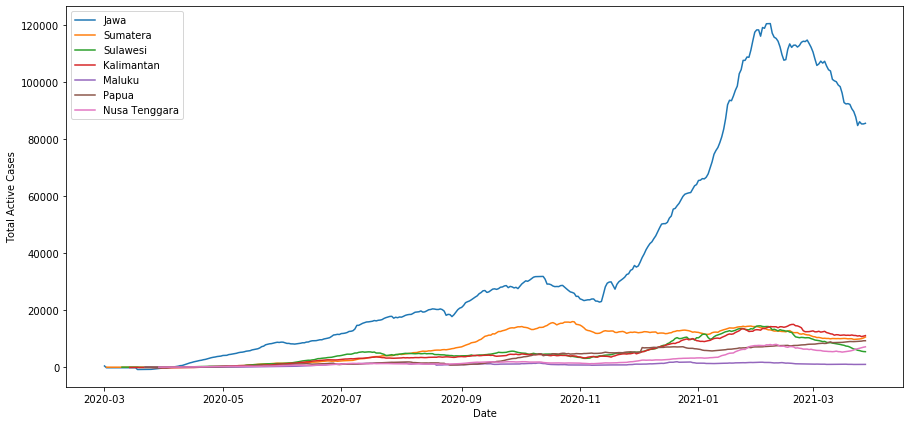

In [39]:
plt.figure(figsize=(15, 7))

for i in range(island_count.Island.nunique()):
    var = island_count.Island.unique()[i]
    _ = sns.lineplot(x=island_count[island_count.Island == var]['Date'], y=island_count[island_count.Island == var]['Total Active Cases'], label=var)

## Case Development on each province per Island

### Java

In [40]:
tot_pop[tot_pop.Island == 'Jawa'].Location.nunique()

6

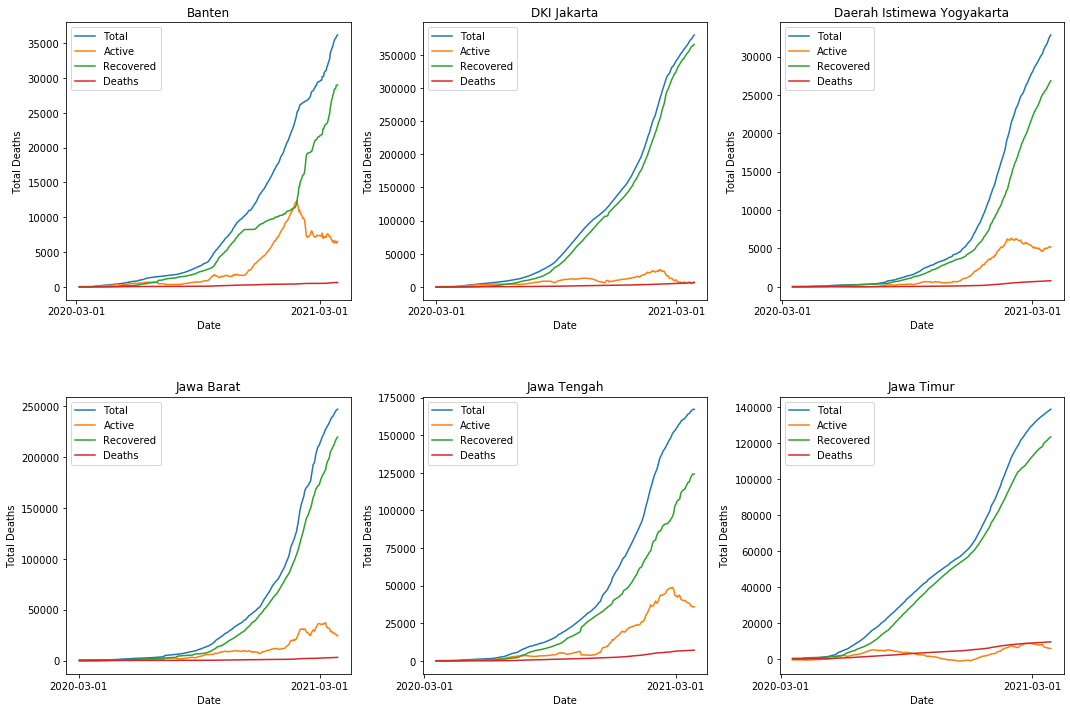

In [41]:
rows = 2
cols = 3
plt.figure(figsize=(cols*5, rows*5))

n=1
for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Jawa'):
        plt.subplot(rows, cols, n)
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label = 'Total')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label = 'Active')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Recovered'], label = 'Recovered')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Deaths'], label = 'Deaths')
        my_xticks = _.get_xticks()
        plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
        plt.title(var)
        n+=1
        
plt.tight_layout(h_pad =5)

### Sumatra

In [42]:
tot_pop[tot_pop.Island == 'Sumatera'].Location.nunique()

10

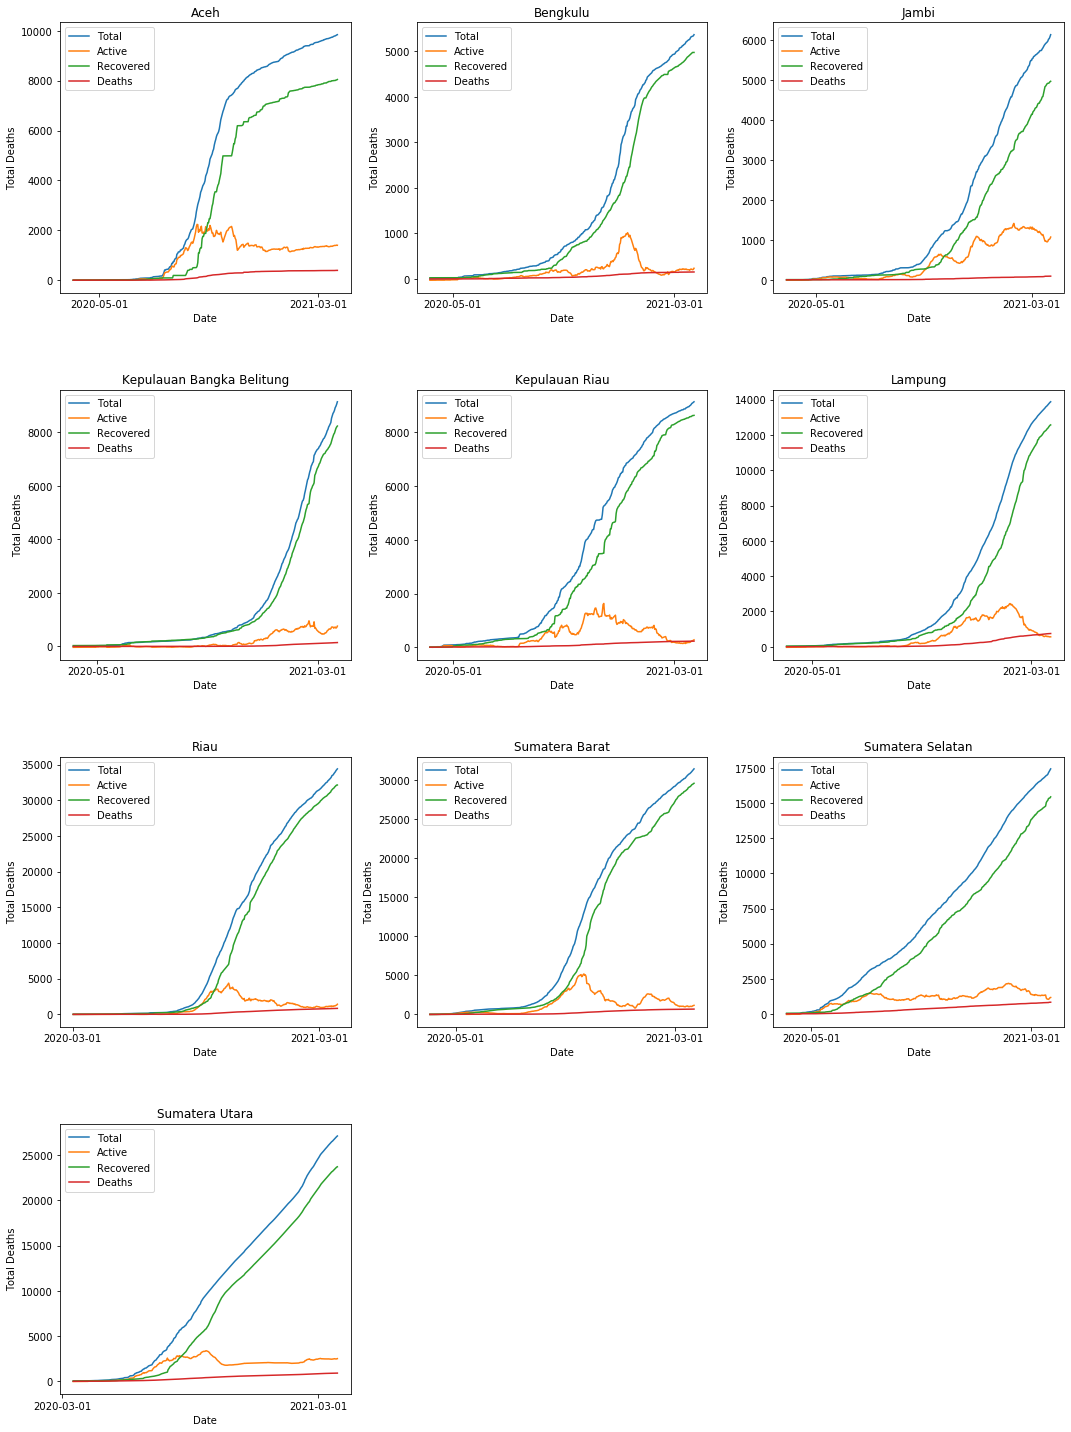

In [43]:
rows = 4
cols = 3
plt.figure(figsize=(cols*5, rows*5))

n=1
for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Sumatera'):
        plt.subplot(rows, cols, n)
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label = 'Total')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label = 'Active')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Recovered'], label = 'Recovered')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Deaths'], label = 'Deaths')
        my_xticks = _.get_xticks()
        plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
        plt.title(var)
        n+=1
        
plt.tight_layout(h_pad =5)

### Borneo

In [44]:
tot_pop[tot_pop.Island == 'Kalimantan'].Location.nunique()

5

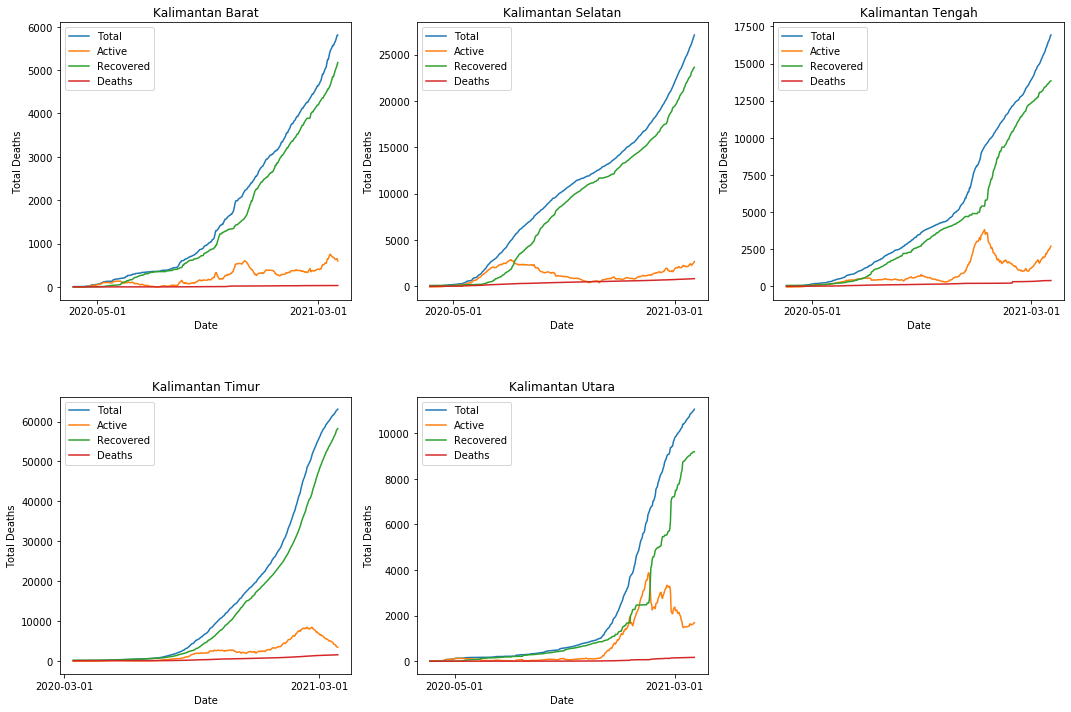

In [45]:
rows = 2
cols = 3
plt.figure(figsize=(cols*5, rows*5))

n=1
for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Kalimantan'):
        plt.subplot(rows, cols, n)
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label = 'Total')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label = 'Active')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Recovered'], label = 'Recovered')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Deaths'], label = 'Deaths')
        my_xticks = _.get_xticks()
        plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
        plt.title(var)
        n+=1
        
plt.tight_layout(h_pad =5)

### Nusa Tenggara & Bali

In [46]:
tot_pop[tot_pop.Island == 'Nusa Tenggara'].Location.nunique()

3

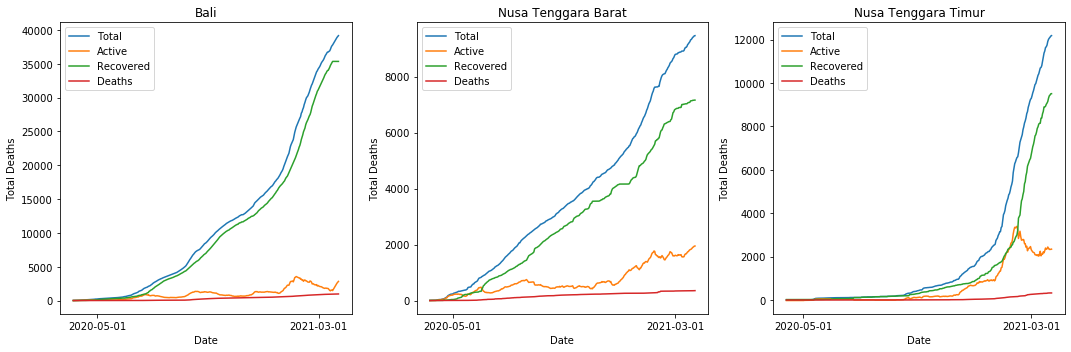

In [47]:
rows = 1
cols = 3
plt.figure(figsize=(cols*5, rows*5))

n=1
for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Nusa Tenggara'):
        plt.subplot(rows, cols, n)
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label = 'Total')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label = 'Active')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Recovered'], label = 'Recovered')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Deaths'], label = 'Deaths')
        my_xticks = _.get_xticks()
        plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
        plt.title(var)
        n+=1
        
plt.tight_layout(h_pad =5)

### Sulawesi

In [48]:
tot_pop[tot_pop.Island == 'Sulawesi'].Location.nunique()

6

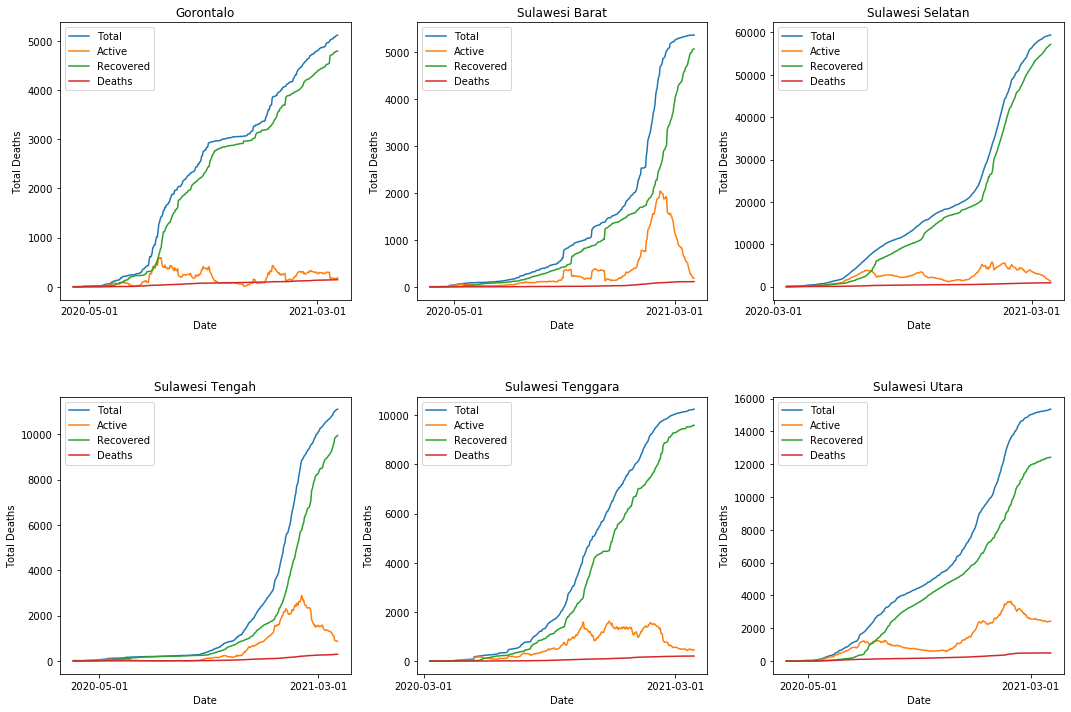

In [49]:
rows = 2
cols = 3
plt.figure(figsize=(cols*5, rows*5))

n=1
for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Sulawesi'):
        plt.subplot(rows, cols, n)
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label = 'Total')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label = 'Active')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Recovered'], label = 'Recovered')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Deaths'], label = 'Deaths')
        my_xticks = _.get_xticks()
        plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
        plt.title(var)
        n+=1
        
plt.tight_layout(h_pad =5)

### Papua

In [50]:
tot_pop[tot_pop.Island == 'Papua'].Location.nunique()

2

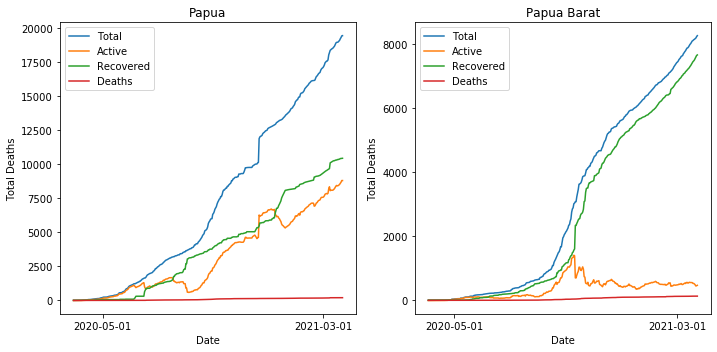

In [51]:
rows = 1
cols = 3
plt.figure(figsize=(cols*5, rows*5))

n=1
for i in range(len(tot_pop)):
    var = tot_pop.Location[i]
    if (tot_pop.Island[i] == 'Papua'):
        plt.subplot(rows, cols, n)
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Cases'], label = 'Total')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Active Cases'], label = 'Active')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Recovered'], label = 'Recovered')
        _ = sns.lineplot(x=df[df.Location == var]['Date'], y=df[df.Location == var]['Total Deaths'], label = 'Deaths')
        my_xticks = _.get_xticks()
        plt.xticks([my_xticks[0], my_xticks[-1]], visible=True, rotation="horizontal")
        plt.title(var)
        n+=1
        
plt.tight_layout(h_pad =5)